# Big  Mart Data Analysis

### With predictive modeling and visualization 

#### loading packages 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#### Loding data

In [2]:
# Load data
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### check the quility of the data

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
print('The shape of train data' , train_data.shape)
print('The shape of test data' , test_data.shape)

The shape of train data (8523, 12)
The shape of test data (5681, 11)


#### Checking and eliminating the null values as per nature of analysis

In [9]:
# checkig the null value
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

##### for cat. col. replace null values with mode and for numeric  col. replace null value s with mean

In [11]:
mean_item_weight = train_data['Item_Weight'].mean()
train_data['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [12]:
mode_outlet_size = train_data['Outlet_Size'].mode()[0]
train_data['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [13]:
print("Missing values in train_data:\n", train_data.isnull().sum())

Missing values in train_data:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [14]:
mean_item_weight_test = test_data['Item_Weight'].mean()
test_data['Item_Weight'].fillna(mean_item_weight_test, inplace=True)
mode_outlet_size_test = test_data['Outlet_Size'].mode()[0]
test_data['Outlet_Size'].fillna(mode_outlet_size_test, inplace=True)
print("Missing values in test_data:\n", test_data.isnull().sum())

Missing values in test_data:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


#### Droping unused columns & changing the datatypes

In [15]:
train_data = train_data.drop(columns=['Item_Identifier'])
test_data = test_data.drop(columns=['Item_Identifier'])

In [16]:
train_data = train_data.drop(columns=['Outlet_Identifier'])
test_data = test_data.drop(columns=['Outlet_Identifier'])

In [17]:
train_data['Item_Type'] = train_data['Item_Type'].astype('category')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].astype('category')
train_data['Outlet_Size'] = train_data['Outlet_Size'].astype('category')
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].astype('category')
train_data['Outlet_Type'] = train_data['Outlet_Type'].astype('category')

In [18]:
test_data['Item_Type'] = test_data['Item_Type'].astype('category')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].astype('category')
test_data['Outlet_Size'] = test_data['Outlet_Size'].astype('category')
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].astype('category')
test_data['Outlet_Type'] = test_data['Outlet_Type'].astype('category')

#### feature engengineering 

In [19]:
# Feature Engineering
current_year = 2023  # Replace with the current year
train_data['Years_Established'] = current_year - train_data['Outlet_Establishment_Year']
test_data['Years_Established'] = current_year - test_data['Outlet_Establishment_Year'] # calculate the year
train_data['Price_Per_Unit_Weight'] = train_data['Item_MRP'] / train_data['Item_Weight']
test_data['Price_Per_Unit_Weight'] = test_data['Item_MRP'] / test_data['Item_Weight'] # calculate unite price per item

In [20]:
train_data = train_data.drop(columns=['Item_Weight'])
test_data = test_data.drop(columns=['Item_Weight'])

In [21]:
train_data = train_data.drop(columns=['Item_MRP'])
test_data = test_data.drop(columns=['Item_MRP'])

In [22]:
train_data = train_data.drop(columns=['Outlet_Establishment_Year'])
test_data = test_data.drop(columns=['Outlet_Establishment_Year'])

#### Encode the categorical columns variable

In [23]:
# Encoding Categorical Variables
label_encoder = LabelEncoder()
train_data['Outlet_Type'] = label_encoder.fit_transform(train_data['Outlet_Type'])
test_data['Outlet_Type'] = label_encoder.transform(test_data['Outlet_Type'])
train_data['Item_Type'] = label_encoder.fit_transform(train_data['Item_Type'])
test_data['Item_Type'] = label_encoder.transform(test_data['Item_Type'])
train_data['Item_Fat_Content'] = label_encoder.fit_transform(train_data['Item_Fat_Content'])
test_data['Item_Fat_Content'] = label_encoder.transform(test_data['Item_Fat_Content'])
train_data['Outlet_Size'] = label_encoder.fit_transform(train_data['Outlet_Size'])
test_data['Outlet_Size'] = label_encoder.transform(test_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = label_encoder.fit_transform(train_data['Outlet_Location_Type'])
test_data['Outlet_Location_Type'] = label_encoder.transform(test_data['Outlet_Location_Type'])

In [24]:
train_data.head(2)

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,Price_Per_Unit_Weight
0,1,0.016047,4,1,0,1,3735.1380,24,26.861204
1,2,0.019278,14,1,2,2,443.4228,14,8.153581


In [25]:
test_data.head(2)

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established,Price_Per_Unit_Weight
0,1,0.007565,13,1,0,1,24,5.198178
1,4,0.038428,4,1,1,1,16,10.520458


#### Arranging columns

In [26]:
desired_columns = ['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size', 'Item_Type', 'Item_Fat_Content', 'Item_Visibility', 'Price_Per_Unit_Weight', 'Years_Established' , 'Item_Outlet_Sales']
train_data = train_data[desired_columns]

In [27]:
desired_columns = ['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size', 'Item_Type', 'Item_Fat_Content', 'Item_Visibility', 'Price_Per_Unit_Weight', 'Years_Established']
test_data = test_data[desired_columns]

#### Separating Training and Test Data

In [28]:
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standard Scaling

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#### Modeling - Linear Regression

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_val_scaled)
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_val, lr_predictions)))

Linear Regression RMSE: 1327.2528331915173


#### Modeling - RandomForest

In [31]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_val_scaled)
print('RandomForest RMSE:', np.sqrt(mean_squared_error(y_val, rf_predictions)))

RandomForest RMSE: 1171.4976842967947


#### Modeling - XGBoost

In [32]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_val_scaled)
print('XGBoost RMSE:', np.sqrt(mean_squared_error(y_val, xgb_predictions)))

XGBoost RMSE: 1197.715645014865


#### Hyperparameter Tuning - XGBoost

In [33]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train_scaled, y_train)
best_xgb_model = grid_search.best_estimator_
best_xgb_predictions = best_xgb_model.predict(X_val_scaled)
print('Tuned XGBoost RMSE:', np.sqrt(mean_squared_error(y_val, best_xgb_predictions)))

Tuned XGBoost RMSE: 1172.0957419268536


#### Final Predictions on the Test Dataset

In [34]:
test_data_scaled = scaler.transform(test_data)
final_predictions = best_xgb_model.predict(test_data_scaled)

#### geting final predictive data

In [35]:
test_data1 = pd.read_csv('Test.csv')

In [36]:
test_data1.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [37]:
# Save final predictions to a CSV file
Item_Outlet_Sales = pd.Series(final_predictions , name = 'Item_Outlet_Sales')
submission = pd.concat([test_data1, Item_Outlet_Sales] , axis = 1)
submission.to_csv('final_predictions.csv', index=False)

#### Creating some visual insight

#### Load packages for viz.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [39]:
submission.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1227.657349
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,2418.202881
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,506.599487


#### checking the test data prediction sales price as per Item_Type

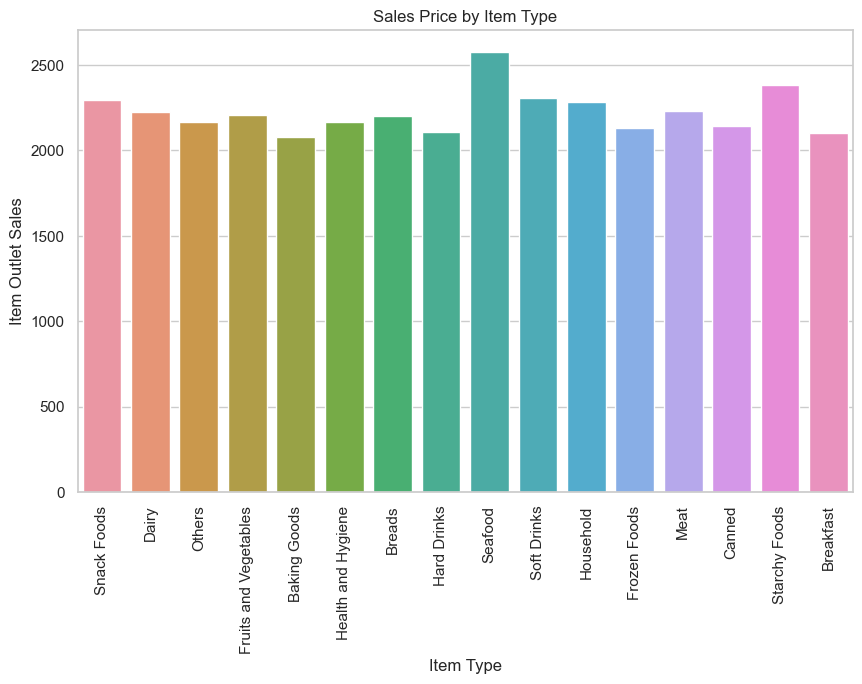

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=submission, ci=None)


plt.xticks(rotation=90)
plt.title('Sales Price by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')

plt.show()

#### Sales against the establishment year

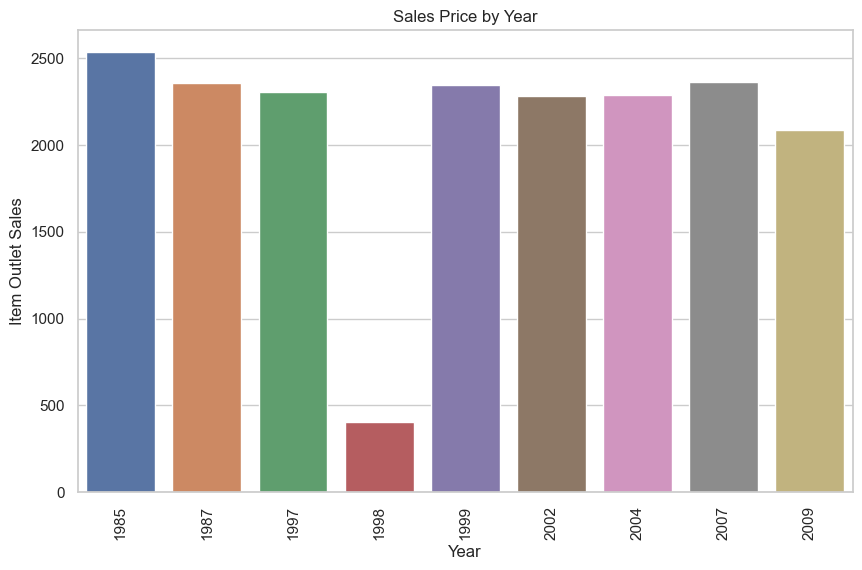

In [41]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=submission, ci=None)


plt.xticks(rotation=90)
plt.title('Sales Price by Year')
plt.xlabel('Year')
plt.ylabel('Item Outlet Sales')

plt.show()

#### Sales against Item_Fat_Content

In [42]:
submission['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)
submission['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)
submission['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)

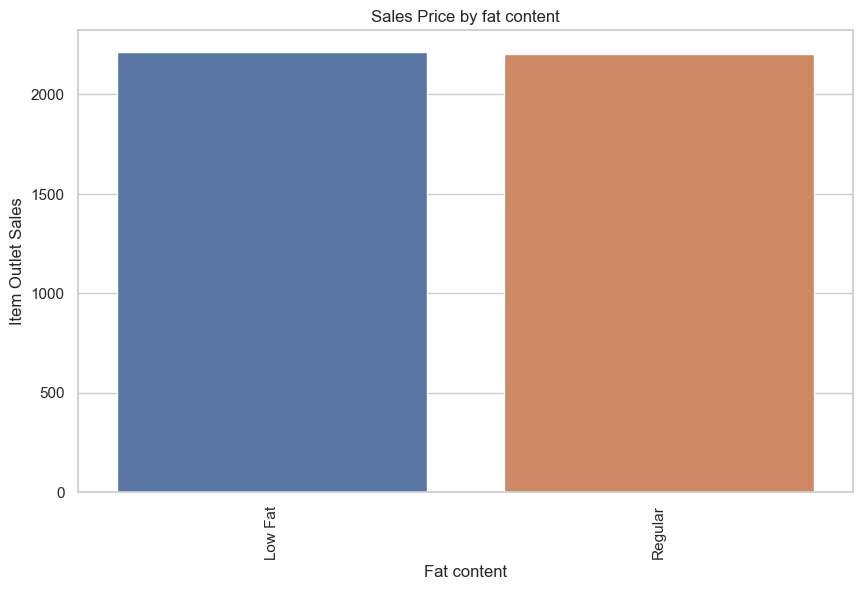

In [43]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=submission, ci=None)


plt.xticks(rotation=90)
plt.title('Sales Price by fat content')
plt.xlabel('Fat content')
plt.ylabel('Item Outlet Sales')

plt.show()

#### Sales against Outlet_Size

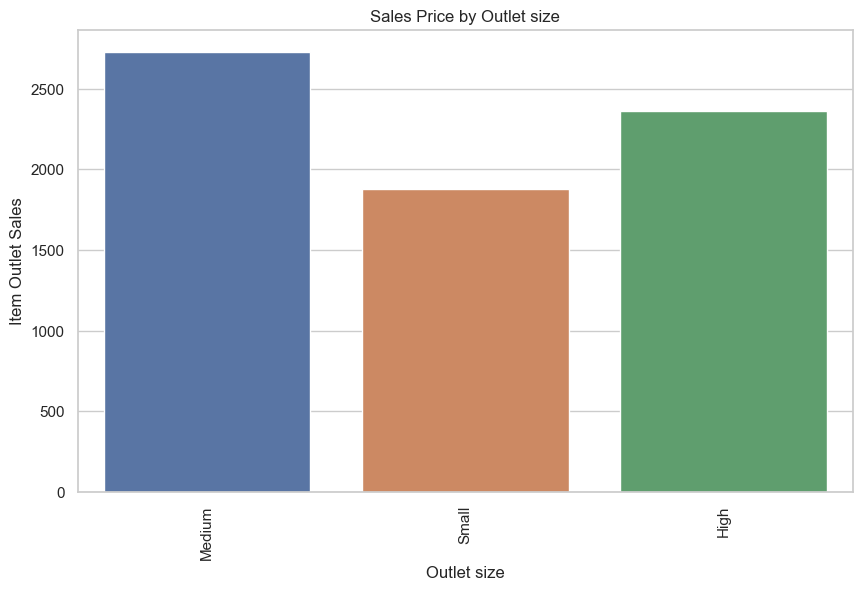

In [44]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=submission, ci=None)


plt.xticks(rotation=90)
plt.title('Sales Price by Outlet size')
plt.xlabel('Outlet size')
plt.ylabel('Item Outlet Sales')

plt.show()

#### Sales against Outlet_Type

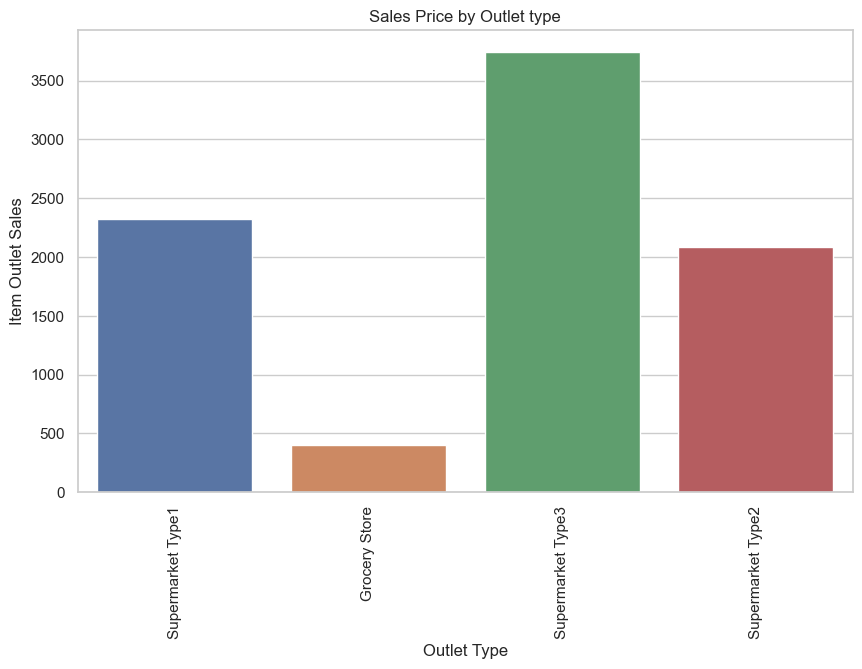

In [45]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=submission, ci=None)


plt.xticks(rotation=90)
plt.title('Sales Price by Outlet type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')

plt.show()

#### Sales against Outlet_Location_Type

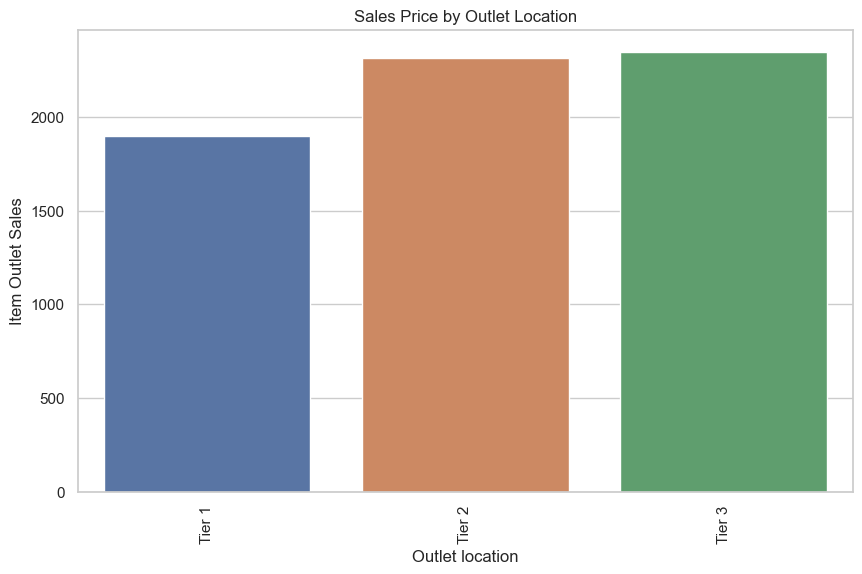

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=submission, ci=None)


plt.xticks(rotation=90)
plt.title('Sales Price by Outlet Location')
plt.xlabel('Outlet location')
plt.ylabel('Item Outlet Sales')

plt.show()

#### Sales against MRP

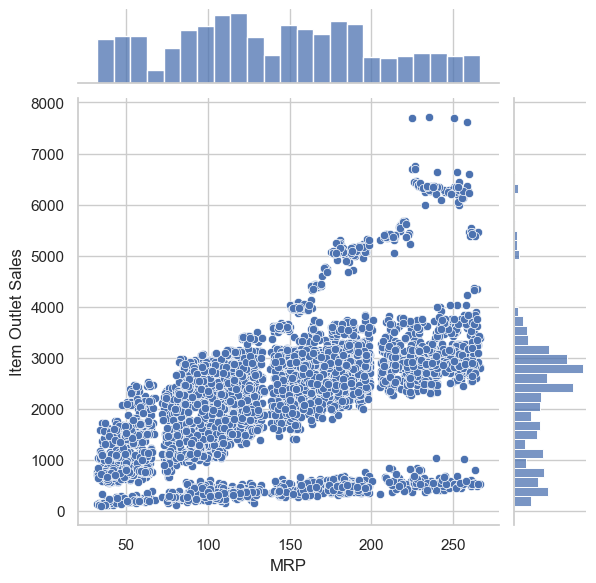

In [47]:
sns.jointplot(x='Item_MRP', y='Item_Outlet_Sales', data=submission, kind='scatter')

plt.xlabel('MRP')
plt.ylabel('Item Outlet Sales')

plt.show()

#### Sales against Item Weight

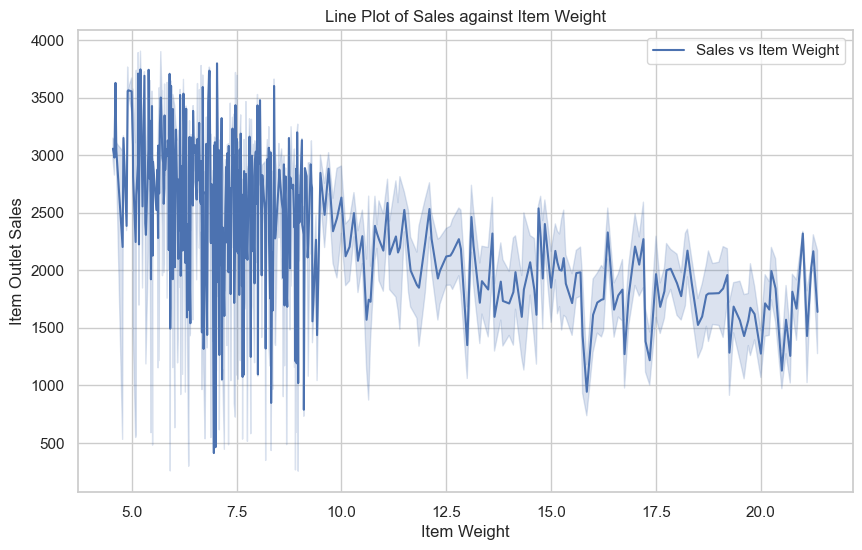

In [48]:
plt.figure(figsize=(10, 6))

# Line plot of sales against item weight
sns.lineplot(x='Item_Weight', y='Item_Outlet_Sales', data=submission, label='Sales vs Item Weight')

plt.title('Line Plot of Sales against Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')

plt.legend()
plt.show()

#### sales against Visibility 


In [49]:
correlation = submission['Item_Visibility'].corr(submission['Item_Outlet_Sales'])

print(f"Correlation between Item Visibility and Item Outlet Sales: {correlation}")

Correlation between Item Visibility and Item Outlet Sales: -0.1785351937983421


#### Correlation mapping

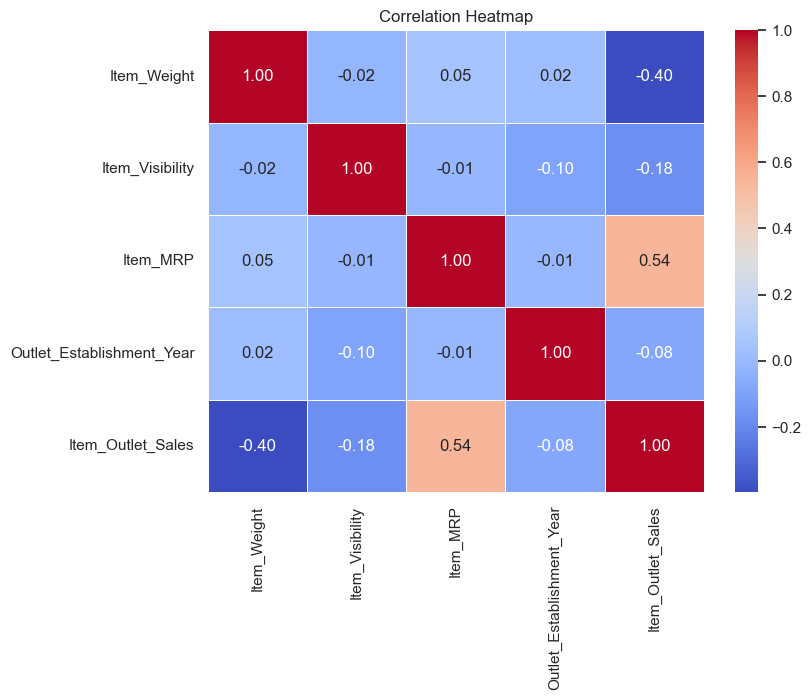

In [50]:
plt.figure(figsize=(8, 6))

correlation_matrix = submission.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


### Please drop your valuable review and comment

# Thank You and Please Up Vote ,like and share